In [3]:
import cv2
import numpy as np

# Step 1: Load the image
image = cv2.imread('mountain.jpg')

# Check if the image was successfully loaded
if image is None:
    print("Error: Could not load image.")
else:
    # 1. Translation (Shift the image)
    height, width = image.shape[:2]
    translation_matrix = np.float32([[1, 0, 100], [0, 1, 50]])  # Move 100 pixels right and 50 pixels down
    translated_image = cv2.warpAffine(image, translation_matrix, (width, height))

    # 2. Scaling (Resize the image)
    scaled_image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)  # Resize to half

    # 3. Rotation (Rotate the image around its center)
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1)  # Rotate 45 degrees
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    # 4. Affine Transformation (Apply a skew)
    pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
    pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
    affine_matrix = cv2.getAffineTransform(pts1, pts2)
    affine_image = cv2.warpAffine(image, affine_matrix, (width, height))

    # 5. Perspective Transformation (Change perspective)
    pts1 = np.float32([[0, 0], [width - 1, 0], [0, height - 1], [width - 1, height - 1]])
    pts2 = np.float32([[0, 0], [width - 1, 0], [int(0.33 * width), height - 1], [int(0.66 * width), height - 1]])
    perspective_matrix = cv2.getPerspectiveTransform(pts1, pts2)
    perspective_image = cv2.warpPerspective(image, perspective_matrix, (width, height))

    # Display the results
    cv2.imshow('Original Image', image)
    cv2.imshow('Translated Image', translated_image)
    cv2.imshow('Scaled Image', scaled_image)
    cv2.imshow('Rotated Image', rotated_image)
    cv2.imshow('Affine Image', affine_image)
    cv2.imshow('Perspective Image', perspective_image)

    # Wait for a key press and close all windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()


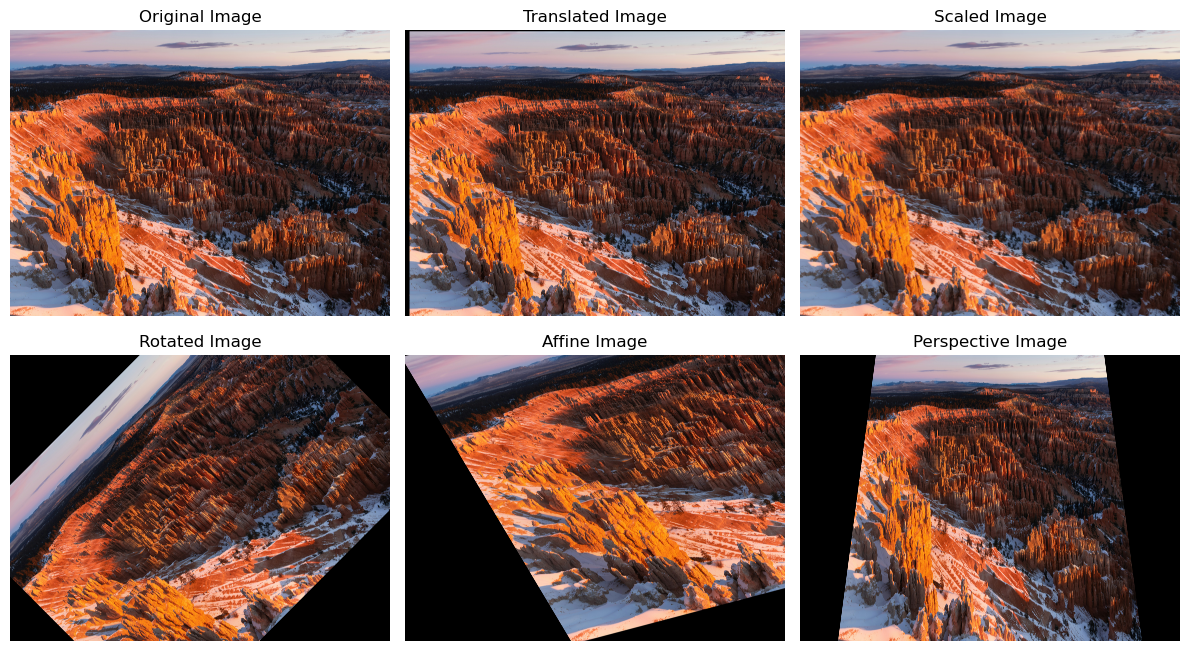

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread('mountain.jpg')

# Check if the image was successfully loaded
if image is None:
    print("Error: Could not load image.")
else:
    # 1. Translation (Shift the image)
    height, width = image.shape[:2]
    translation_matrix = np.float32([[1, 0, 100], [0, 1, 50]])  # Move 100 pixels right and 50 pixels down
    translated_image = cv2.warpAffine(image, translation_matrix, (width, height))

    # 2. Scaling (Resize the image)
    scaled_image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)  # Resize to half

    # 3. Rotation (Rotate the image around its center)
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1)  # Rotate 45 degrees
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    # 4. Affine Transformation (Apply a skew)
    pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
    pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
    affine_matrix = cv2.getAffineTransform(pts1, pts2)
    affine_image = cv2.warpAffine(image, affine_matrix, (width, height))

    # 5. Perspective Transformation (Change perspective)
    # Update the perspective points to show a better transformation effect
    pts1 = np.float32([[0, 0], [width - 1, 0], [0, height - 1], [width - 1, height - 1]])
    pts2 = np.float32([[int(0.2 * width), 0], [int(0.8 * width), 0], 
                       [int(0.1 * width), height], [int(0.9 * width), height]])
    perspective_matrix = cv2.getPerspectiveTransform(pts1, pts2)
    perspective_image = cv2.warpPerspective(image, perspective_matrix, (width, height))

    # Display the results using matplotlib
    plt.figure(figsize=(12, 10))

    # Original Image
    plt.subplot(3, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Translated Image
    plt.subplot(3, 3, 2)
    plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
    plt.title('Translated Image')
    plt.axis('off')

    # Scaled Image
    plt.subplot(3, 3, 3)
    plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
    plt.title('Scaled Image')
    plt.axis('off')

    # Rotated Image
    plt.subplot(3, 3, 4)
    plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    plt.title('Rotated Image')
    plt.axis('off')

    # Affine Image
    plt.subplot(3, 3, 5)
    plt.imshow(cv2.cvtColor(affine_image, cv2.COLOR_BGR2RGB))
    plt.title('Affine Image')
    plt.axis('off')

    # Perspective Image
    plt.subplot(3, 3, 6)
    plt.imshow(cv2.cvtColor(perspective_image, cv2.COLOR_BGR2RGB))
    plt.title('Perspective Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
